## Este é um notebook de **DEEPLEARNING COM PYTORCH** do curso da alura ministrado por Camila Laranjeira
    
O notebook é um guia para iniciar no mundo do deeplearning usando o framework Pytorch, conta com muitos exemplos praticos, definição de arquiteturas, treinamento, tunning, modulos, funções da rede, Gráfico de convergência, otimizadores e muito mais, **TUDO EXPLICADO LINHA POR LINHA** <br><br>
Muito obg Camila por compartilhar seu conhecimento, espero que gostem :)

# Sintaxe básica do Pytorch

Assim como o NumPy, o Pytorch é uma biblioteca de processamento **vetorial/matricial/tensorial**. Operações sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com operações sobre tensores do NumPy.

Para mais informações sobre tensores em PyTorch, consulte a documentação: <br> https://pytorch.org/docs/stable/tensors.html




## Tipos de tensores 

Você pode criar tensores do PyTorch de inúmeras formas! Vamos ver primeiro os tipos de tensores que estão ao nosso dispor. Para isso, vamos converter listas comuns do Python em tensors do PyTorch.

Note que a impressão de tensores dos tipos ```float32``` e ```int64``` não vêm acompanhadas do parâmetro de tipo ```dtype```, visto que se tratam dos tipos padrão trabalhados pelo PyTorch.

In [1]:
import torch         #importando o pytorch
lista = [ [1,2,3],
          [4,5,6] ]  #criando uma matriz

tns = torch.Tensor(lista)  #transformando a lista em tensor
print(tns.dtype)           #printando o tipo
print(tns)                 #printando o tensor

print('')
tns = torch.DoubleTensor(lista)  #transformando a lista em um tensor double
print(tns.dtype)                 #printando o tipo
print(tns)                       #printando o tensor

print('')
tns = torch.LongTensor(lista)  #transformando a lista em um tensor long
print(tns.dtype)               #printando o tipo
print(tns)                     #printando o tensor


torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])

torch.float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


## Outras formas de instanciar tensores

### A partir de arrays Numpy
$torch.from\_numpy()$ 

>torch.from_numpy(ndarray) → Tensor


In [2]:
import numpy as np

arr = np.random.rand(3,4)  #criando array aleatorio com 3 linhas e 4 colunas
print(arr)                 #printando o array
print(arr.dtype)           #printando o tipo do array

print('')
tns = torch.from_numpy(arr)  #cria um tensor de um array numpy
print(tns)                   #printa o tensor
print(tns.dtype)             #printa o tipo do tensor

[[0.28208207 0.13418978 0.72856723 0.42637813]
 [0.54305864 0.40106136 0.55266277 0.56773568]
 [0.42545519 0.17610926 0.57193922 0.3281141 ]]
float64

tensor([[0.2821, 0.1342, 0.7286, 0.4264],
        [0.5431, 0.4011, 0.5527, 0.5677],
        [0.4255, 0.1761, 0.5719, 0.3281]], dtype=torch.float64)
torch.float64


### Tensores inicializados
Essas funções recebem como parâmetro o tamanho de cada dimensão do tensor. Aqui vamos conhecer as seguintes funções:

$torch.ones()$  -> Cria um tensor preenchido com zeros.
> torch.ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensortorch.ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor

$torch.zeros()$ -> Cria um tensor preenchido com uns.
> torch.zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensortorch.zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor

$torch.randn()$ -> Cria um tensor preenchido com números aleatórios a partir de uma distribuição normal.
> torch.randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensortorch.randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensor

In [3]:
tns1 = torch.ones(2, 3)  #cria um tensor só com 1 em tudo(2 linhas e 3 colunas)
tns0 = torch.zeros(3, 5) #cria um tensor só com 0 em tudo(3 linhas e 5 colunas)
tnsr = torch.randn(3, 3) #cria um tensor preenchido com números aleatórios a partir de uma distribuição normal.(3 linhas e 3 colunas)

print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-1.4685, -1.6109, -1.1020],
        [ 0.1321, -1.0344, -0.8194],
        [-0.4364,  1.7686, -1.5811]])


### Tensor para array numpy

In [4]:
arr = tnsr.data.numpy()  #transforma um tensor em array numpy
print(arr)
print(arr.dtype)         #printa o tipo

[[-1.4685009  -1.6109071  -1.1019839 ]
 [ 0.1320814  -1.0343865  -0.81941086]
 [-0.43635473  1.7685755  -1.581136  ]]
float32


## Indexação

De posse dessa informação, a indexação é feita de forma similar a arrays Numpy, através da sintaxe de colchetes ```[]```.

In [5]:
lista = [ [1,2,3],
          [4,5,6],                #criando uma matriz
          [7,8,9]]        

tnsr = torch.Tensor(lista)        #transformando a lista em tensor

print(tnsr[0:2, 2].data.numpy())  #pega da primira linha ate a segunda linha, pega a 3 coluna[2] e transforma essa reposta em array numpy
print(tnsr[0, 1].item())          #pega na primeira linha a segunda coluna

[3. 6.]
2.0


## Operações com tensores

A função ```.item()``` utilizada anteriormente extrai o número de um tensor que possui um único valor, permitindo realizar as operações numéricas do Python. Caso o item não seja extraído, operações que envolvam tensores vão retornar novos tensores.

Vale ressaltar também que operações entre tensores são realizadas **ponto a ponto**, operando cada elemento ```(i, j)``` do tensor ```t1```, com o elemento ```(i, j)``` do tensor ```t2```.

In [6]:
tns1 = torch.randn(2,4,3)  #cria 2 tensores, com 4 linhas e 3 colunas com valores aleatorios
tns2 = torch.ones(2,4,3)   #cria 2 tensores, com 4 linhas e 3 colunas com 1 de valor
print('TENSOR 1:')
print(tns1)
print('TENSOR 2:')
print(tns2)

print('')
print('TENSOR 1 * TENSOR 2:')
print(tns1*tns2)           #podemos multiplicar os vetores porque eles são de dimensões iguais

TENSOR 1:
tensor([[[ 1.0486, -0.6487, -0.6433],
         [ 0.0513,  1.4998, -2.3731],
         [-0.2798, -1.6599,  0.3675],
         [ 0.7470, -1.0740,  0.5853]],

        [[ 1.3179, -1.6974,  1.6941],
         [-1.4207,  0.6586, -0.2659],
         [-0.0474,  0.1222, -0.1708],
         [-0.9822,  1.1431, -0.9517]]])
TENSOR 2:
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

TENSOR 1 * TENSOR 2:
tensor([[[ 1.0486, -0.6487, -0.6433],
         [ 0.0513,  1.4998, -2.3731],
         [-0.2798, -1.6599,  0.3675],
         [ 0.7470, -1.0740,  0.5853]],

        [[ 1.3179, -1.6974,  1.6941],
         [-1.4207,  0.6586, -0.2659],
         [-0.0474,  0.1222, -0.1708],
         [-0.9822,  1.1431, -0.9517]]])


## Função ```.size()``` e ```.view()```

## **Reorganização das suas dimensões**


Size: 
> Tensor.size(dim=None) → torch.Size or intTensor.size(dim=None) → torch.Size or int

View:
> Tensor.view(*shape) → TensorTensor.view(*shape) → Tensor


Uma operação **importantíssima** na manipulação de tensores para Deep Learning é a reorganização das suas dimensões. Dessa forma podemos, por exemplo, **linearizar um tensor n-dimensional**.

In [7]:
print('tamanho do vetor',tns2.size())       #printando as dimensões do tensor
print('num de folhas:',tns2.size(0),'num de linhas:',tns2.size(1),'num de colunas:',tns2.size(2))
print('')
print(tns2)
print('')
print(tns2.view(tns2.size(0), 12))          #vai pegar o primeiro valor do tamanho para folhas(nesse caso 2),
                                            # e vai fazer 12 colunas, o total tem que ser igual ao outro tensor
print('')
                                            #tensor original: [2, 4, 3] = 2x4x3 = 24
                                            #tensor novo: [1,2,12] ou [2,12] = 24
                                            #ao inves de calcularmos isso, podemos deixar que o pytorch faça isso para nós
print(tns2.view(2, -1))                     #definimos o valor de linhas e colocamos -1 para o pytorch calcular pra nos 
print('')
print(tns2.view(-1, 12))                    #ou definimos as colunas e deixamos o pytorch calcular a linha 

tamanho do vetor torch.Size([2, 4, 3])
num de folhas: 2 num de linhas: 4 num de colunas: 3

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


## GPU Cast

Para que o seu script dê suporte a infraestruturas com e sem GPU, é importante definir o dispositivo no início do seu código de acordo com a verificação apresentada a seguir. Essa definição de dispositivo será utilizada toda vez que precisarmos subir valores na GPU, como os pesos da rede, os gradientes, etc.

In [8]:
if torch.cuda.is_available():      #se gpu estiver disponivel
  device = torch.device('cuda')    #o device vai ser a gpu
else:                              #se nao estiver disponivel
  device = torch.device('cpu')     #o device vai ser a cpu
  
print('device: ',device,'\n')
tns2 = tns2.to(device)             #jogando o tensor para a GPU
print("tensor na GPU:\n",tns2)

device:  cuda 

tensor na GPU:
 tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], device='cuda:0')


# Classificação Linear

Nesse notebook vamos refrescar a sua memória sobre equações lineares ao mesmo tempo que te ajudaremos a enxergar uma reta como um classificador linear. 

**Nota**: Aqui já damos os primeiros passos para a criação de redes neurais.

## Equação da reta

A equação da reta é aprendida na forma $ax + by + c$, mas para nos adequarmos às nomenclaturas de redes neurais, podemos reescrever essa equação como $\mathbf{w_1x_1 + w_2x_2 + b}$. Ou seja, $\mathbf{w_1}$, $\mathbf{w_2}$ e $\mathbf{b}$ são os parâmetros que definem o nosso **modelo linear**, a nossa reta.

Vamos começar realizando o plot de uma reta específica:
$\mathbf{-1x_1 + 4x_2 + 0.4}$


In [9]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

def plotline(a, b, c):   #função para plotar um grafico de linha
  x = np.linspace(-2, 4, 50)
  y = (-a*x -c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)

### Solucionando a equação da reta para diferentes pontos

A seguir vamos selecionar três pontos no espaço, e soucionar a equação da reta para esses pontos. 

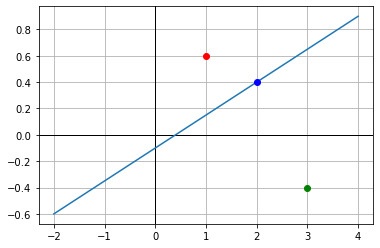

In [10]:
p1 = (2,  0.4)  #bolinha azul
p2 = (1,  0.6)  #bolinha vermelha
p3 = (3, -0.4)  #bolinha verde

plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')  #poltando o ponto em azul
plt.plot(p2[0], p2[1], color='r', marker='o')  #plotando o ponto em vermelho
plt.plot(p3[0], p3[1], color='g', marker='o')  #plotando o ponto em verde


In [11]:
#solucionando a equação de reta para cada ponto
#AZUL:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)          #podemos ver que está bem em cima da linha (valor = 0)

#VERMELHO:
ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)          #podemos ver que está a cima da linha (valor = 1.80)

#VERDE:
ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)          #podemos ver que está a baixo da linha (valor = -4.20)

0.00
1.80
-4.20


Note que o ponto <font color='blue'>$p_1$</font> está na reta, enquanto <font color='red'>$p_2$</font> está acima da reta e <font color='green'>$p_3$</font> abaixo. Ao solucionar a equação da reta para esses três pontos, tivemos respectivamente resultados <font color='blue'>nulo $(=0)$</font>, <font color='red'>positivo $(>0)$</font> e <font color='green'>negativo $(<0)$</font>.

Esse comportamento é consistente para quaisquer pontos na reta, acima ou abaixo dela. Ou seja, se chamarmos a equação da reta de $f(x)$, temos as seguintes regras:

* <font color='blue'>$f(x) = 0$</font> define pontos na reta
* <font color='red'>$f(x) > 0$</font> define pontos acima da reta
* <font color='green'>$f(x) < 0$</font> define pontos abaixo da reta


## Modelo Linear

Nossa reta pode ser interpretada como um modelo linear, que nada mais é do que uma **função de mapeamento** $X \rightarrow Y$, que mapeia cada ponto em $X$ para um ponto em $Y$. Em outras palavras, dados os parâmetros $W = \{w_1, w_2\}$ e $b$ de uma reta, é possível mapear uma entrada $X = \{x_1, x_2\}$ para a saída $f(x; W, b)$.

Para problemas de classificação, os valores de $y$ para novas entradas $x$ vão definir se $x$ é um ponto <font color='red'>acima</font> ou <font color='green'>abaixo</font> da reta, formando portanto um classificador capaz de **separar linearmente problemas com duas classes**.

<img src="https://drive.google.com/uc?export=view&id=18Emd5S0LxY_-6_oqOW_1oBztomJGuRfF" width="500">


### Regra Geral

Formalizando a nomenclatura de redes neurais, em duas dimensões $(x_1, x_2)$ nosso modelo linear tem dois **pesos** $(w_1, w_2)$ e um **viés** $b$, que em inglês são chamados de **w**eight e **b**ias. 

Em duas dimensões nosso modelo forma uma reta, como vimos anteriormente. Para um número de dimensões $d > 2$, modelos lineares são chamados de **hiperplanos**, e são compostos por:
* um peso $w_i$ para cada dimensão $x_i$. 
* um único viés $b$

Exemplo, para 3 dimensões $(x_1, x_2, x_3)$ teríamos três pesos $(w_1, w_2, w_3)$ e um único viés $b$. Sua função de mapeamento seria $y = w_1x_1 + w_2x_2 + w_3x_3 + b$
 
De forma geral, define-se que dada uma entrada com $d$ dimensões, a função de mapeamento de um modelo linear é $$y = \sum^{d}_{i=1}w_ix_i + b$$


y = w1*x1 + w2*x2 + b

y = w1*x1 + w2*x2 + w3*x3 + b

## Exercício Sugerido

**Vamos treinar um classificador linear em duas dimensões usando a tecnologia mais avançada que existe: o seu cérebro!**

A célula a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função ```make_classification()``` do sklearn. <br>
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

0


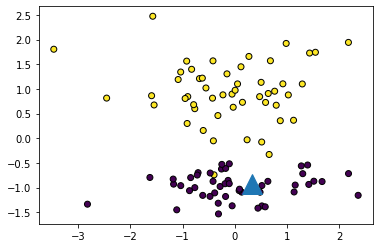

In [12]:
from sklearn.datasets import make_classification               #dataset de distribuição para a classificação
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(15)                                             #setando a seed para ser replicavel e não mudar o grafico

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)           #setando as configuraçoes da nossa dispersão

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,edgecolor='k')   #plotando o grafico

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

**Seu trabalho é** encontrar **NA MÃO** os melhores parâmetros $(W, b)$ de um modelo linear para classificar a distribuição gerada. 

O ideal é **não** fazer por tentativa e erro, mas prestar atenção no impacto de cada mudança realizada. Note que os pesos $W$ são componentes angulares do seu modelo, enquanto o viés $b$ é o componente linear que desloca a reta no espaço.


9.0


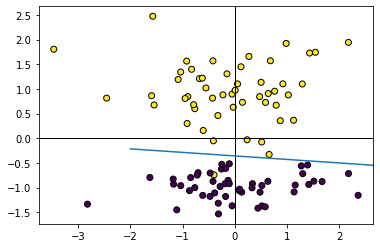

In [13]:

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

#   ALTERE OS PARAMENTROS AQUI   #    
    
#valores ajustados na mão para achar a melhor reta que separa os dados    
w1 = 0.5  #a    angulação da linha
w2 = 7    #b    angulação da linha
b  = 2.5  #c    o quanto a linha começa levantada ou descida
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora podemos utilizar o nosso modelo como um classificador linear com um simples **```if```** para avaliar a solução da equação da reta para novos pontos no espaço.

classe: 0 
cor: blue


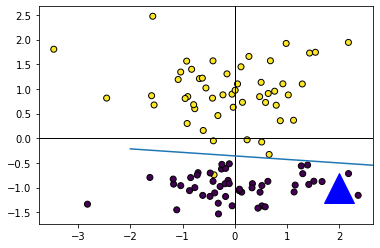

In [14]:
def classify(ponto, w1, w2, b):         #criando uma função para validar nosso modelo
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:          #Se for maior que 0
    return 1, 'yellow'  #é amarelo
  else:                 #Se for menor que 0
    return 0, 'blue'    #é azul
  
p = (2, -1)                          #passando cordenadas de um ponto
classe, cor = classify(p, w1, w2, b) #classificando esse ponto(amarelo ou azul)
print("classe:",classe, '\ncor:',cor)                   #printando a classe e a cor

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

De posse da função ```classify()``` podemos agora classificar cada um dos pontos gerados aleatoriamente pelo ```make_classification```, calculando assim a acurácia do nosso modelo.

In [15]:
acertos = 0
                                #vamos criar uma função para contar todos nosso acertos
for k in range(len(X)):         #iterando sobre os dados e avaliando se esta a baixo ou acima da linha
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:             #se o predito for igual ao rotulo
    acertos += 1                #mais um acerto
    
    
print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 99.0


# Camada ```Linear```

Vamos começar importando o módulo ```nn``` e o ```torch```

In [16]:
import torch
from torch import nn # neural networks

Agora vamos instanciar nossa camada linear, com uma entrada de dimensionalidade ```d = 3``` e a saída de tamanho ```1```, já que estamos instanciando um perceptron simples. 

Qualquer dúvida, a documentação está logo ali ;)<br>
https://pytorch.org/docs/stable/nn.html#torch.nn.Linear

In [17]:
torch.manual_seed(42)

perceptron=nn.Linear(3,1)#entrada:3, saida:1
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


Temos em mãos exatamente o mesmo modelo da imagem clássica do perceptron!

<img src="https://drive.google.com/uc?export=view&id=1Ad1nKUG8ujVWysOauKYzOhhmR26Zl6yC" width="330">

Os pesos ```W``` e o viés ```b``` são inicializados aleatoriamente pelo pytorch. Podemos consultar essa informação de duas formas:
* iterando em seus **```named_parameters```**
* acessando cada parâmetro individualmente através do seu nome padrão.

In [18]:
for nome,tensor in perceptron.named_parameters():#iteração nos parametros
    print(nome,tensor.data)                      #printa o nome, os pesos do tensor e o bias

print('')
print('outro jeito de fazer a mesma coisa:')
print('')
print(perceptron.weight.data)                    #printa os pesos do tensor
print(perceptron.bias.data)                      #printa o bias

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

outro jeito de fazer a mesma coisa:

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [19]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]  #aloca cada peso em uma variavel
b = perceptron.bias.data.numpy()                #aloca o valor de bias em uma variavel

É importante não se esquecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimensões está no limite da nossa capacidade de visualização, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo ```torch```. 

Para isso, usaremos aqui a biblioteca de visualização matplotlib, com o toolkit de plot 3D.<br>
Mais informações em: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mpl_toolkits.mplot3d.Axes3D.plot_surface

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):                         #plotando o hiperplano com os valores inicializados pelo pytorch
  
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.gca(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='plasma')
  

plot da função do perceptron que criamos:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


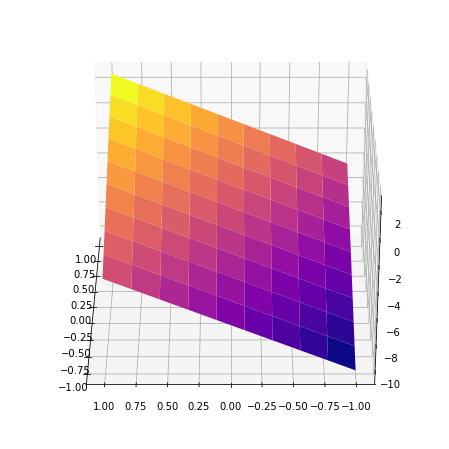

In [21]:
print('plot da função do perceptron que criamos:')
plot3d(perceptron);

## Forward
O fluxo da informação de entrada através da rede recebe o nome de *forward*, já que a informação é passada *para a frente*. Vamos então realizar o forward da nossa rede de um ~~homem~~ pereptron só. Para isso, basta realizar uma chamada de função com a variável onde instaciamos a camada ```Linear```.

```python
# Fizemos anteriormente a instância da camada
linear = nn.Linear(in_features=3, out_features=1)

# Para realizar o forward
y = linear(X)
```

tensor([-0.2194], grad_fn=<AddBackward0>)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


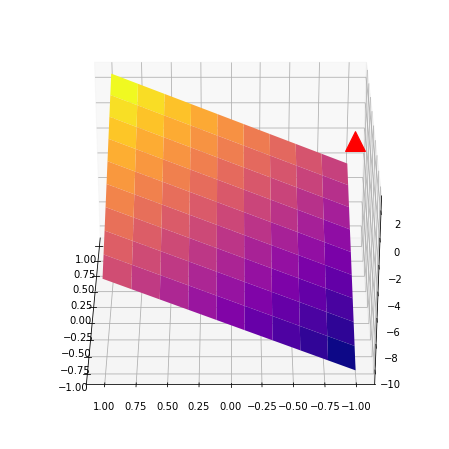

In [22]:
X = torch.Tensor([0, -1, 2])                                             #criando um tensor
y=perceptron(X)                                                          #dando o forward na rede

print(y)                                                                 #valor retornado pela rede

plot3d(perceptron)                                                       #plotando o perceptron 
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)   #plotando no hiperplano o nosso tensor([0, -1, 2])

# Funções de Ativação

O módulo ```nn```, que utilizamos para criar uma camada linear, também contém as principais funções de ativação. Então vamos primeiro importar o ```torch``` e o módulo ```nn``` <br>


In [23]:
import torch
from torch import nn

Agora vamos retomar o exemplo do início desse capítulo, onde implementamos um modelo de classificação linear, definindo empiricamente os parâmetros adequados.

-2.8


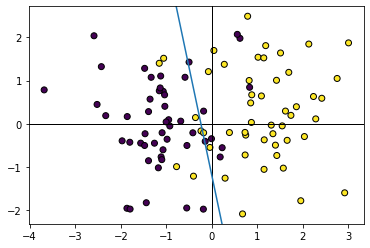

In [24]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
#setando os parametros 
w1 = 5   #a
w2 = 1   #b
b  = 1.2 #c
plotmodel(w1, w2, b)              #plotando a linha do nosso modelo 

p = (-1, 1)                       #setando um ponto
print(w1 * p[0] + w2 * p[1] + b)  #plotando o valor(se está a baixo ou acima da linha)     

Agora vamos instanciar uma camada Linear análoga à nossa reta, ou seja:
* ```in_features  = 2``` : dimensionalidade da entrada
* ```out_features = 1``` : dimensionalidade da saída

Vamos instanciar também uma ativação sigmóide para compor o nosso modelo de classificação.

Documentação: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

Em seguida vamos substituir os pesos do perceptron com os parâmetros da nossa reta. Para isso criaremos um objeto ```Parameter```, o tipo de dado que camadas do PyTorch aceitam para representar os seus parâmetros. <br>
Documentação: https://pytorch.org/docs/stable/nn.html#torch.nn.Parameter


In [25]:
perceptron = nn.Linear(2, 1)  #criando camada de entrada 2 e saida 1
activation = nn.Sigmoid()     #definindo a função de ativação sendo a sigmois(formato S)

print('pesos:',perceptron.weight.data) #printando os pesos
print('bias: ',perceptron.bias.data)   #printando o bias

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))  #setando os pesos (w1 e w2 estao na calula superior)
perceptron.bias   = nn.Parameter(torch.Tensor([b]))         #setando o bias   (bias esta na celula superior)

print('\nnovo peso:',perceptron.weight.data)
print('novo bias:',perceptron.bias.data)



pesos: tensor([[-0.1549,  0.1427]])
bias:  tensor([-0.3443])

novo peso: tensor([[5., 1.]])
novo bias: tensor([1.2000])


Temos portanto:
* uma distribuição de pontos com duas classes linearmente separáveis
* um modelo linear de classificação binária, empiricamente definido, que inclui uma função de ativação sigmóide. 

Agora vamos ver a diferença entre o resultado apresentado pelo perceptron antes e depois da função de ativação. Para isso, selecionei empiricamente alguns pontos da distribuição (índices 17, 21, 43 e 66) que nos ajudarão a entender o impacto da sigmóide.

ret:    distancia do ponto em relação a linha
limiar: classe em que o ponto pertence
act:    certeza do modelo em relação a classificação(o valor varia conforme a função de ativação)


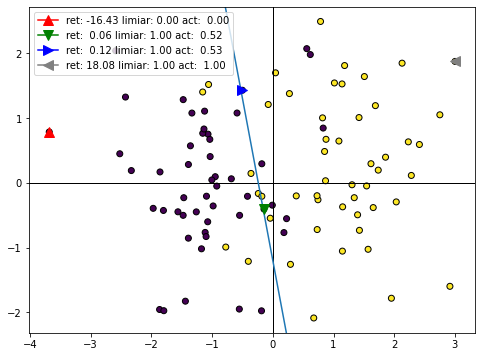

In [26]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  
  ret = perceptron(x)
  act = activation(ret)
  
  act_limiar = 0 if ret.data < 0 else 1
  
  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

print('ret:    distancia do ponto em relação a linha')
print('limiar: classe em que o ponto pertence')
print('act:    certeza do modelo em relação a classificação(o valor varia conforme a função de ativação)')
plt.legend()
plt.show()


Com a sigmoid, elementos na fronteira de decisão recebem o valor 0.5, indicando baixa certeza sobre a classe desses elementos. Quanto mais afasta da zona de confusão, maior a certeza da classificação (seja para 0, ou para 1).

Podemos experimentar diferentes funções de ativação e ver como elas nos ajudam a interpretar a saída do perceptron.

In [27]:
# Descomente uma das linhas abaixo e rode novamente a célula anterior

activation = nn.ReLU()
#activation = nn.Tanh()

# Definindo uma Arquitetura no PyTorch



**Carregando dados**

Exemplo de dados não-linearmente separáveis (distribuição em lua): <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html<br>
Esse exemplo forma duas "luas" plotadas e temos que encontrar uma função que separe esses dados não lineares

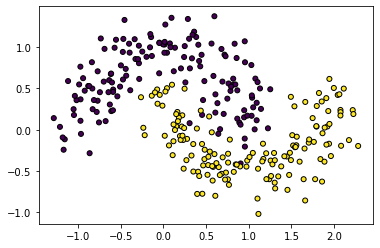

In [28]:
from sklearn.datasets import make_moons        #dataset em formato de lua
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)  #definindo como as luas vão ser 
plt.scatter(X1[:, 0], X1[:, 1], marker='o',    #plotando o grafico
 c=Y1, s=25, edgecolor='k');

# nn.Sequential

O módulo ```nn.Sequential``` é um container onde se pode colocar múltiplos módulos. Ao realizar um ```forward``` em um objeto ```Sequential``` ele aplicará sequencialmente os módulos nele contidas para gerar uma saída.

Segue abaixo um exemplo desse módulo contendo 2 camadas ```Linear``` intercaladas por uma função de ativação ```ReLU```.

In [29]:
#SETANDO OS PARAMETROS
input_size = 2   #dimensoes dos dados de entrada da rede
hidden_size = 8  #numero de neuronios na hidden
output_size = 1  #tamanho do output

#criando uma rede simples
net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),   #hidden (escondida)
                    nn.ReLU(),                                                     #ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size))  #output (saída)
print(net)


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


### Visualizando a rede do nn.Sequential

O módulo ```summary``` da biblioteca **```torchsummary```** nos permite visualizar mais informações sobre a nossa rede, como quantidade de parâmetros e o tamanho que cada elemento ocupa na memória.

Para mais informações, acesse: https://github.com/sksq96/pytorch-summary

In [30]:
!pip install torch-summary

In [31]:
from torchsummary import summary
summary(net,input_size=(1,input_size)) #passa de parametro a rede e o tamanho da entrada

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0

### Forward do nn.Sequential

Basicamente transformando um np array em um tensor float 32 e dando o predict na rede

In [32]:
print('tamanho dos dados de entrada: ',X1.shape,'\n')   #vendo o shape de X1(parte dos pontos do formato de lua)


                                                        #geralmente as redes ja são inicializadas com float32,
                                                        #e ao converter do array numpy para vetor, vai para float64,
                                                        #então colocamos o foat no final para garantir a mudança para float32
print('antes da transformação: ',X1.dtype)
tensor = torch.from_numpy(X1).float()                   #criando tensor float64 de um array numpy
print('depois da transformação:',tensor.dtype,'\n')

pred   = net(tensor)                                    #passando pela rede e dando o predict
print('tamanho do predict: ',pred.size())               #tamanho do predict


tamanho dos dados de entrada:  (300, 2) 

antes da transformação:  float64
depois da transformação: torch.float32 

tamanho do predict:  torch.Size([300, 1])


In [33]:
print(pred[:5])#printando os 5 primeiros predicts

tensor([[-0.2015],
        [-0.2921],
        [-0.4701],
        [-0.4311],
        [-0.2788]], grad_fn=<SliceBackward0>)


# Classe nn.Module

A forma mais organizada de definir modelos em PyTorch é implementando uma classe nos moldes da classe ```nn.Module```. Para redes pequenas, como as que estamos aprendendo até o momento, sua importância pode não se destacar, mas modelos maiores e com funcionalidades mais complexas, são mais fáceis de implementar e realizar manutenções dessa forma.

Funções obrigatórias do ```nn.Module```.
* ```__init()__```: definição de hiperparâmetros e instância do modelo 
* ```forward()```: Fluxo da entrada para produzir uma saída

In [34]:
class MinhaRede(nn.Module):#criando classe MinhaRede
  
    #função inicializadora
  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()
    
    # Definir a arquitetura - usamos o self para podermos acessar a variavel de qualquer lugar da classe(aqui em baixo no forward)
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
    #função de forward na rede
  def forward(self, X):
    
    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))    #de dentro para fora, entao X vai passar pela hidden, e depois vai passar pela ReLU
    output = self.output(hidden)          #vai passar o valor de hidden pela camada de output
    
    return output


#setando os hiperparametros da rede
input_size = 2     #tamanho dos dados de entrada
hidden_size = 16   #quantidade de neuronios na camada oculta
output_size = 1    #camada de saida(numero de classes)

net = MinhaRede(input_size,hidden_size, output_size)  #inicializando a rede com os parametros escolhidos
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=16, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
)


### Visualizando a rede do nn.Module


In [35]:
from torchsummary import summary
summary(net,input_size=(1,input_size))#passa de parametro a rede e o tamanho da entrada

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            48
├─ReLU: 1-2                              --
├─Linear: 1-3                            17
Total params: 65
Trainable params: 65
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            48
├─ReLU: 1-2                              --
├─Linear: 1-3                            17
Total params: 65
Trainable params: 65
Non-trainable params: 0

### Forward do nn.Module

O forward vai ser identico nos dois casos, que é basicamente transformando um np array em um tensor float 32 e dando o predict na rede

In [36]:
print('tamanho dos dados de entrada: ',X1.shape,'\n')   #vendo o shape de X1(parte dos pontos do formato de lua)


                                                        #geralmente as redes ja são inicializadas com float32, 
                                                        #e ao converter do array numpy para vetor, vai para float64,
                                                        #então colocamos o foat no final para garantir a mudança para float32
print('antes da transformação: ',X1.dtype)
tensor = torch.from_numpy(X1).float()                   #criando tensor float64 de um array numpy
print('depois da transformação:',tensor.dtype,'\n')

pred   = net(tensor)                                    #passando pela rede e dando o predict
print('tamanho do predict: ',pred.size())               #tamanho do predict


tamanho dos dados de entrada:  (300, 2) 

antes da transformação:  float64
depois da transformação: torch.float32 

tamanho do predict:  torch.Size([300, 1])


# Treinamento da rede

# Funções de Perda

Vamos trabalhar com **CLASSIFICAÇÃO** e **REGRESSÃO**

O módulo ```nn``` e suas 1001 utilidades, também fornece as implementações das principais funções de perda. Então vamos primeiro importar o ```torch``` e o módulo ```nn``` <br>

Antes de tudo, vamos conferir qual dispositivo de hardware está disponível para uso.

Vamos trabalhar com o dataset de classificação de vinhos.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html


## Carregando o dataset de **VINHO** e criando uma rede MLP

In [37]:
from sklearn import datasets     #dataset do sklearn

wine = datasets.load_wine()      #load do dataset de vinho
data = wine.data                 #dados do vinho
target = wine.target             #rotulo do vinho

print('tamanho dos dados(X):',data.shape,'\ntamanho do rotulo(y):', target.shape,'\n')  #printando o tamanho dos dados e o tamanho do rotulo
print('colunas(X):',wine.feature_names,'\ntarget(y):', wine.target_names)            #printa as features do vinho e tambem nas possiveis classes(3 classes)

tamanho dos dados(X): (178, 13) 
tamanho do rotulo(y): (178,) 

colunas(X): ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 
target(y): ['class_0' 'class_1' 'class_2']


### Implementando o MLP

In [38]:
class WineClassifier(nn.Module):                         #criando a classe usando o nn.Module
    
    def __init__(self,input_size,hidden_size,out_size):  #função inicializadora
        super(WineClassifier,self).__init__()
        
        self.hidden = nn.Linear(input_size,hidden_size)  #camada linear
        self.relu   = nn.ReLU()                          #função de ativação
        self.out    = nn.Linear(hidden_size,out_size)    #camada linear
        self.softmax= nn.Softmax()                       #função de ultima camada para classificação(transforma em probabilidade a saida)
        
        
    def forward(self,X):                                 #função de forward na rede
        
        feature = self.relu(self.hidden(X))              #a função ReLU vai receber os parametros de self.hidden, que por sua vez vai propagar os dados(X)
        output  = self.softmax(self.out(feature))        #softmax vai receber os parametros de self.out, que por sua vez vai receber de feature
        
        return output                                    #vai retornar o valor de output
    
input_size  = data.shape[1]                              #tamanho de entrada vai ser o tamanho das dimensoes dos dados(colunas,features)
hidden_size = 32                                         #numero de neuronios da camada oculta
out_size    = len(wine.target_names)                     #tamanho da camada de saida(numero de classes do target)


net=WineClassifier(input_size,hidden_size, out_size).to(device) #cast na GPU

print(net)

WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


## Classificação

O primeiro passo é instanciar a função de perda de sua escolha. Trata-se de um problema de classificação com 3 classes, nesse caso a Cross Entropy é a função recomendada, que no PyTorch recebe o nome de *CrossEntropyLoss*: https://pytorch.org/docs/stable/nn.html#crossentropyloss 

**Assim como a rede, as entradas e os rótulos, a função de perda também deve ser carregada na GPU**


In [39]:
criterion = nn.CrossEntropyLoss().to(device) #função de perda com cast na GPU

Antes de aplicar a função de perda, vamos fazer o cast dos dados para tensores e extrair as predições ```y'``` da rede.

In [40]:
Xtns = torch.from_numpy(data).float()  #transformando os dados em tensores
Ytns = torch.from_numpy(target)        #transformando os rotulos em tensores

# Cast na GPU
Xtns = Xtns.to(device)                 #cast na GPU
Ytns = Ytns.to(device)                 #cast na GPU

print('',Xtns.dtype,'\n', Ytns.dtype)  #como podemos ver eles são de tipos diferentes

 torch.float32 
 torch.int64


In [41]:
pred = net(Xtns)    #pegando o valor predito pela rede

print('Tamanho dos dados de vinho: ',Xtns.shape)
print('tamanho do predict:         ',pred.shape)

Tamanho dos dados de vinho:  torch.Size([178, 13])
tamanho do predict:          torch.Size([178, 3])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


As funções de perda implementadas no PyTorch esperam o seguinte padrão de chamada:

```python
loss = criterion(prediction, target)
```

Vale lembrar que cada função de perda possui especificidades quanto às dimensões dos seus parâmetros. Para a Cross Entropy:
* prediction: ```(N, C)```
* target: ```(N,)```

In [42]:
loss = criterion(pred, Ytns) #calculando a loss media
print(loss)

tensor(1.2200, device='cuda:0', grad_fn=<NllLossBackward0>)


## Regressão

Regressão
Vamos trabalhar com o dataset de Diabetes, cujo objetivo é prever a progressão da diabetes em um paciente.

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

In [43]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[14])
print(target[14])
     

(442, 10) (442,)
[ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25563519e-02
  1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
 -3.19914449e-02 -7.56356220e-02]
118.0


In [44]:
class Diabetes_Regressor(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(Diabetes_Regressor, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = 1  # Progressão da diabetes

net_diabetes = Diabetes_Regressor(input_size, hidden_size, out_size).to(device) #cast na GPU 

Para solucionar problemas de regressão, as funções de perda correspondentes esperam que ambos o rótulo e a predição tenham a mesma dimensionalidade. Não se trata mais de um problema categórico.

Portanto, vamos simular um problema de regressão e aplicar a MSELoss
Documentação: https://pytorch.org/docs/stable/nn.html#mseloss

In [45]:
criterion = nn.MSELoss().to(device)

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)


torch.Size([442, 10]) torch.Size([442])


In [46]:
pred = net_diabetes(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(28771.2168, device='cuda:0')


In [47]:
criterion = nn.L1Loss().to(device)

pred = net_diabetes(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(151.1335, device='cuda:0')


## Documentação
Veja a documentação para consultar a lista de todas as funções de perda implementadas no PyTorch: <br>
https://pytorch.org/docs/stable/nn.html#loss-functions

# Otimização

Para entender o processo de otimização, vamos utilizar um dataset de classificação de vinhos. A classificação é feita com base em análises químicas realizadas em **três diferentes cultivos** na mesma região da Itália. 

O carregamento dos dados está descrito na documentação do Scikit-Learn:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Dentre os 13 atributos do dataset, selecionamos 2 para facilitar a visualização dos resultados:
* Teor Alcoólico: índice 0 
* Intensidade da cor: índice 9

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0, 0.5, 'color_intensity')

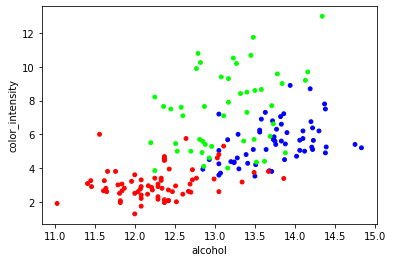

In [48]:
from sklearn import datasets
import matplotlib.pyplot as plt

features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

print(wine.feature_names)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

### Padronização

Um pré-processamento extremamente importante nesse caso é a padronização dos valores de entrada. Como as características variam em intervalos diferentes (cor: [1, 13], álcool: [11, 15]), elas vão exercer diferentes influências sobre o nosso modelo e prejudicar muito a sua convergência. 

* **Ao final dessa aula, sugiro que rode esse script comentando a célula abaixo, e veja o impacto sobre o processo de otimização.**

Text(0, 0.5, 'color_intensity')

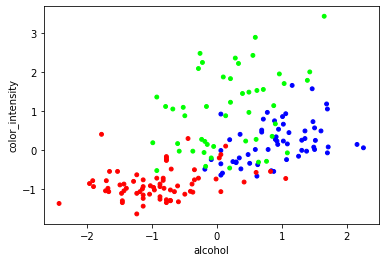

In [49]:
from sklearn.preprocessing import StandardScaler#biblioteca para escalar os dados

scaler = StandardScaler()
data = scaler.fit_transform(data)#escalando os dados

#plotando os dados
plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

## Instanciando sua rede

Antes de entrar nas nuances da otimização, vamos fazer o que já sabemos: instanciar um MLP de duas camadas neurais, uma escondida e outra de saída.

Lembre-se de definir o dispositivo de hardware (cuda ou cpu) antes de iniciar os trabalhos. 


In [50]:
import torch
from torch import nn

torch.manual_seed(42)

#CAST NA GPU
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

#hiperparametros
input_size  = data.shape[1]            #tamanho de entrada dos dados na primeira camada
hidden_size = 32                       #tamanho da hidden size
out_size    = len(wine.target_names)   # numero de classes 

#Criando a rede
net = nn.Sequential(
    nn.Linear(input_size, hidden_size),#camada linear
    nn.ReLU(),                         #função de ativação
    nn.Linear(hidden_size, out_size),  #camada linear
    nn.Softmax()                       #função que da a probabilidade na camada final
)

net = net.to(device)                   #subindo a rede para a GPU

cuda


## Visualizando a fronteira de decisão

Para facilitar o entendimento do processo de otimização, vamos utilizar uma função auxiliar para visualizar a fronteira de decisão da nossa rede neural de classificação. Como acabamos de instanciá-la, seus pesos modelam uma função aleatória que não se ajusta adequadamente aos dados, e isso é facilmente visível em duas dimensões.

Adaptada de:<br>
https://github.com/camilalaranjeira/Neural-Lectures/blob/master/XOR_Problem.ipynb

In [51]:
import numpy as np 


#função para plotar o grafico de divisao de fronteiras
def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


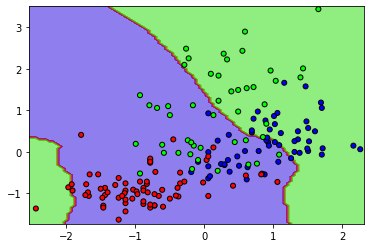

In [52]:
#nessa função é passado: os dados, o target e a rede usada
plot_boundary(data, targets, net)

## Pacote ```torch.optim```

Mãos a obra! Vamos agora otimizar a nossa rede usando os algoritmos mais tradicionais da área. Para isso, a biblioteca ```torch.optim``` nos será bem útil, pois ela implementa os principais algoritmos de otimização de redes neurais.

O primeiro passo é instanciar o otimizador. De acordo com o pacote ```optim```, basta chamar o otimizador escolhido, passando como parâmetro:
* Os parâmetros da rede que será otimizada (```net.parameters()```)
* A taxa de aprendizado

A depender do otimizador, pode ser necessário alimentar outros parâmetros, mas esses dois são obrigatórios!

Vamos utilizar a **Descida do Gradiente** que vimos na aula teórica, implementada pelo otimizador **```optim.SGD```** (*Stochastic Gradient Descent*).

In [53]:
from torch import optim

# Função de Perda -> entropia cruzada
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do Gradiente -> Stochastic Gradient Descent(SGD)
optimizer = optim.SGD(net.parameters(), lr=1e-3)

### Hiperparâmetros

* Valores definidos antes do início do aprendizado
* Devem ser ajustados para cada tarefa específica

A taxa de aprendizado não é o primeiro hiperparâmetro que temos contato. Ao definir a arquitetura da sua rede (quantos neurônios e quantas camadas) você também teve que escolher um valor adequado. **Essa escolha pode ser empírica, mas em geral deve ser experimental**, na busca pelo melhor conjunto de hiperparâmetros para solucionar o seu problema! 

* 🐼 Empírica ([Abordagem do Panda](https://www.coursera.org/lecture/deep-neural-network/hyperparameters-tuning-in-practice-pandas-vs-caviar-DHNcc)): O programador investe seus esforços em um único modelo (um bebê panda), e altera os hiperparâmetros com base na sua experiência e nas observações
* 💻 Experimental: Múltiplos modelos são gerados simultaneamente, com diferentes combinações de hiperparâmetros. Dentre eles, é escolhido o que apresentar melhor performance.  

## Cast do dados

Os dados carregados do Scikit-Learn são retornados como ```ndarrays```, por isso precisamos convertê-los para tensores e carregá-los na GPU (caso disponível) antes de alimentar o modelo neural.


In [54]:
X = torch.FloatTensor(data).to(device)    # transformando em tensor e jogando para a GPU
Y = torch.LongTensor(targets).to(device)  # transformando em tensor e jogando para a GPU

## Treinando um modelo

O treinamento consiste nas etapas que vimos na aula teórica. Aqui vamos relacionar cada etapa ao seu código correspondente.

* Forward
  * Alimentar os dados para a rede <br>
  ```pred = net(X)```
  * Calcular a função de custo <br>
  ```loss = criterion(pred, y)```
* Backpropagation
  * Calcular o gradiente <br>
  ```loss.backward()```
  * Atualizar os pesos <br>
  ```optimizer.step()```


A princípio não vamos falar de procedimentos adequados de treinamento. Vamos apenas realizar as etapas de treinamento e ver o que acontece.

In [55]:
pred = net(X)              #passa os dados pela rede 
loss = criterion(pred, Y)  #calcula a função de perda
loss.backward()            #calcula o gradiente
optimizer.step()           #atualiza os pesos com base no gradiente

tensor(1.0902, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8272, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7346, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6905, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6948, device='cuda:0', grad_fn=<NllLossBackward0>)
CPU times: user 845 ms, sys: 32.3 ms, total: 877 ms
Wall time: 905 ms


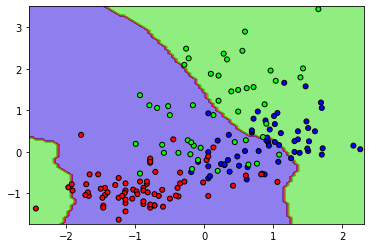

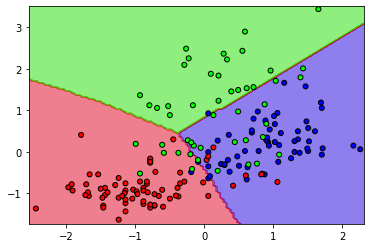

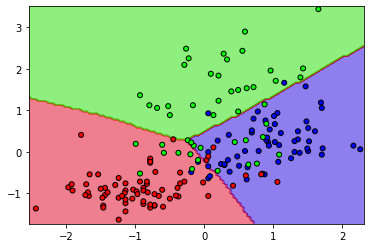

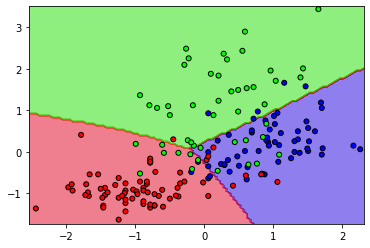

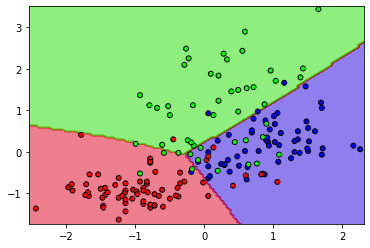

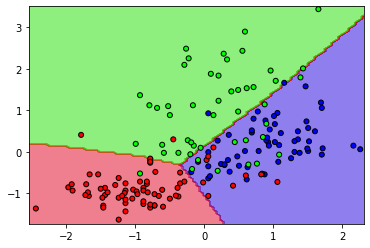

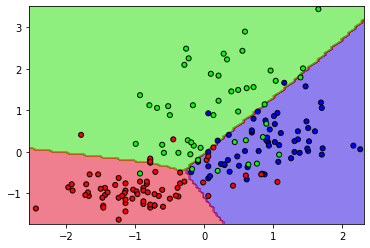

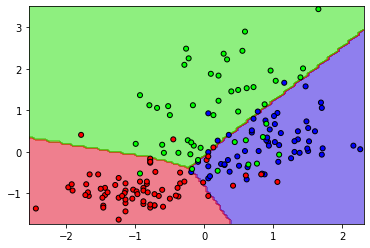

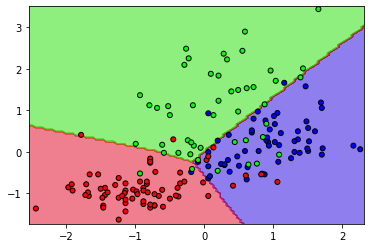

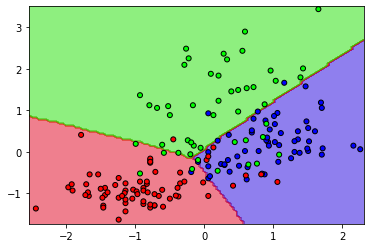

In [56]:
%%time
for i in range(1000):
  # Forward       
  pred = net(X)                        #alimentando a rede
  loss = criterion(pred, Y)            #comparando o previsto com o target certo


  # Backward
  loss.backward()                      #calculando o gradiente
  optimizer.step()                     #atualizando os pesos

  if i % 100 == 0:                     #a cada 100 iterações vai:
    plt.figure()                       #plotar a imagem
    plot_boundary(data, targets, net)  #plotar o grafico de fronteiras
    print(loss)                        #printar a loss

## Treinamento: Conclusão

Como a otimização de uma rede neural é um processo iterativo, os dados de treino devem ser alimentados múltiplas vezes para o modelo. **Cada iteração onde o conjunto de treino inteiro foi utilizado no processo de treinamento é chamado de <font color='color'>época</font>.** Veremos essas nomenclaturas em detalhes nas aulas futuras.

# Carregamento de Dados

Objetivos dessa aula:
* Carregar dados reais do Pytorch
* Implementar o fluxo de treinamento completo de uma rede

Mas calma que essa ainda não é a linha de chegada. Ainda precisaremos falar do fluxo de validação.

## Hiperparâmetros

Agora que a brincadeira está ficando séria, que tal uma sugestão de como organizar o seu código? Para facilitar o entendimento e manutenção do código, mantenha sempre no início os seguintes elementos:
* imports de pacotes
* configuração de hiperparâmetros
* definição do hardware padrão utilizado

Nessa aula vamos trabalhar com dados reais, então **vamos precisar de GPU!** Então não se esqueça de mudar as configurações desse ambiente do colab. <br>
Sugiro rodar esse mesmo código sem GPU em outro momento, só pra sentir o gostinho de como a GPU facilitou o uso de redes neurais.

In [57]:
#imports
import torch
from torch import nn, optim

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#hiperparametros
args={
    'batch_size': 100,
    'num_workers' : 4,
    'lr': 1e-3,
    'weight_decay': 5e-4,
    'num_epochs': 30
    
}
#cast do hardware
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('gpu')
    
print(args['device'])


cuda


## Datasets

O PyTorch possui dois pacotes que trazem datasets prontos para uso.

* Torchtext: https://torchtext.readthedocs.io/en/latest/datasets.html
* Torchvision: https://pytorch.org/docs/stable/torchvision/datasets.html

Como os nomes indicam, são datasets de textos (text) e imagens (vision), duas aplicações onde redes neurais são muito bem sucedidas.

Para aplicações com textos e outros tipos de séries temporais, o carregamento de dados possui nuances que dificultam o entendimento, portanto vamos concentrar no carregamento de imagens.

### Torchvision datasets

Para trabalhar com datasets do pacote torchvision, basta
* Importar o pacote
``` python 
from torchvision import datasets 
```
* Carregar o dataset do seu interesse (ex: MNIST)
``` python 
data = datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
```

Documentação: https://pytorch.org/docs/stable/torchvision/datasets.html

### Torchvision transforms

Não vamos entrar em detalhes sobre transformações de imagens, mas para qualquer dataset é necessário transformá-lo em tensor para que possamos alimentar uma rede em pytorch. Isso pode ser feito no carregamento dos dados, basta:

* Importar o pacote transforms
``` python 
from torchvision import transforms 
```
* preencher o parâmetro ```tranform``` do dataset com a função que converte para tensor.
``` python 
transforms.ToTensor() 
```

Pronto! Quando seu dado for carregado, ele passará pela transformação indicada no parâmetro ```tranform```, nesse caso, convertendo o dado para um tensor.

Documentação: https://pytorch.org/docs/stable/torchvision/transforms.html


In [58]:
train_set = datasets.MNIST('./', 
                           train=True, 
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de Teste:' + str(len(test_set)))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Amostras de treino: 60000
Amostras de Teste:10000


Cada dataset possui uma implementação específica internamente no pytorch. Verifique o ```type``` da variável que recebeu os dados e veja que se refere a uma classe específica do dataset.

No entanto, o item de qualquer dataset **sempre será uma tupla ```(dado, rótulo)```**. 

In [59]:
print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


Podemos então iterar no dataset para observar algumas amostras e seus rótulos.

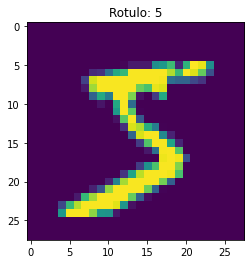

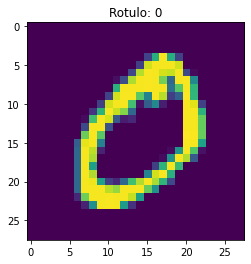

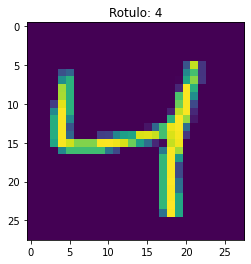

In [60]:
for i in range(3):
  dado, rotulo = train_set[i]

  plt.figure()
  plt.imshow(dado[0])
  plt.title('Rotulo: '+ str(rotulo))

Temos um total de 70 mil amostras, mas elas **ainda não estão carregadas na memória** (isso seria bastante custoso). A vantagem da classe ```Dataset``` do Pytorch é que as amostras só são carregadas quando necessário.

Sugestão: experimente trocar a transformação do Dataset para
```python
transforms.RandomCrop(12)
```
Essa função realiza um recorte aleatório de ```12 x 12``` (pixels) na imagem. Ao carregar a mesma amostra múltiplas vezes, um novo recorte será feito. 

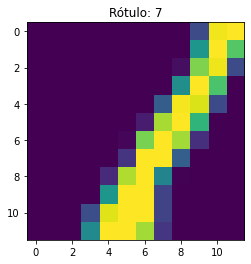

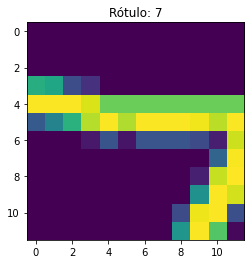

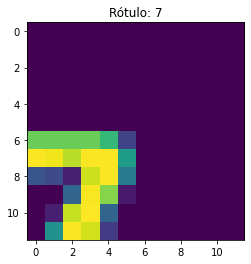

In [61]:
crop_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.RandomCrop(12),
                           download=False)

# Tuple (dado, rótulo)
for i in range(3):
  dado, rotulo = crop_set[0]
  
  plt.figure()
  plt.imshow(dado)
  plt.title('Rótulo: '+ str(rotulo))

Em resumo, cada vez que indexamos um item do dataset, as seguintes operações são realizadas:
* Amostra lida do arquivo e carregada como uma tupla ```(dado, rótulo)```
* As transformações são aplicadas 

## Dataloader

Essa aqui é uma das principais razões do Pytorch ser o pacote preferido de muitos profissionais. O Dataloader gerencia muito bem o carregamento de dados para o treinamento de redes neurais, trazendo as funções: 

* Separação dos dados em batches
* Embaralhando os dados
* Carregando batches em paralelo utilizando threads

O uso de threads no carregamento minimiza períodos ociosos de processamento, visto que a leitura de dados em arquivo é um grande gargalo de tempo.

As três funcionalidades que acabamos de conhecer são controladas pelos parâmetros da chamada do DataLoader.
```python
loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
```


In [62]:
train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


O objeto retornado é um **iterador**, podendo ser utilizado para iterar em loops mas não suportando indexação.

torch.Size([100, 1, 28, 28]) torch.Size([100])


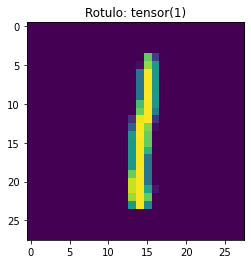

In [63]:
for batch in train_loader:
  
  dado, rotulo = batch
  print(dado.size(), rotulo.size())

  plt.imshow(dado[0][0])
  plt.title('Rotulo: '+ str(rotulo[0]) )
  break

## Implementando o MLP


**Lembrete**: Multi-Layer Perceptrons trabalham somente com dados unidimensionais (vetores). Sendo a imagem com dimensionalidade ```(1, 28, 28)```, precisamos linearizá-la antes de alimentar a rede. Isso implica que o a entrada da rede terá ```input_size = 28 x 28 x 1 = 784```

In [64]:
#criação da rede e fazendo o cast dela na GPU

class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                )#aqui em cima criamos uma camada sequencial, entao não precisamos declarar uma por uma
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    
    #precisamos que transforme em um tensor de 20 com uma unica dimensão
    #o view vai redimensionar o tensor
    #vai manter a primeira dimensão e linearizar o resto
    
    X = X.view(X.size(0), -1)#o 0 vai ser o tamanho do batch(20 no caso), e o -1 é para linearizar tudo

    feature = self.features(X)  #vai fazer o forward em todas as camdas do features, ali no sequential
    output  = self.softmax(self.out(feature))  #vai fazer o forward na camada de saida e passar pela softmax

    return output

input_size  = 28 * 28 #tamanho da imagem em pixel
hidden_size = 128     #numero de neuronios
out_size    = 10      #numero de classes(sao numeros de 0 a 9)

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU 

## Definindo loss e otimizador

In [65]:
criterion = nn.CrossEntropyLoss().to(args['device']) #como são multiplas classes vamos usar o CrossEntropyLoss
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])#adam que é o melhor otimizador  #colocamos o weight_decay para penalizar os pesos muito altos

# Fluxo de Treinamento

Agora vamos aplicar o conhecimento que acabamos de aprender!

Relembrando o passo a passo do fluxo de treinamento:
* Iterar nas épocas
* Iterar nos batches
* Cast dos dados no dispositivo de hardware
* Forward na rede e cálculo da loss
* Cálculo do gradiente e atualização dos pesos

Para acompanhar a convergência do seu modelo (e garantir que tudo foi feito certinho), ao final de cada época podemos imprimir a média e o desvio padrão das perdas de cada iteração.

In [66]:
%%time
for epoch in range(args['num_epochs'])[:5]:#iterando apenas 5 epocas

  epoch_loss = []
  for batch in train_loader:#iterando os batches
    
    dado, rotulo = batch

    # Cast na GPU
    dado   = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])

    # Forward 
    pred = net(dado)
    loss = criterion(pred, rotulo)
    epoch_loss.append(loss.cpu().data)

    # Backward
    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)

  print("Epoca %d, Loss: %.4f +\- %.4f" % (epoch, epoch_loss.mean(), epoch_loss.std()) )


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoca 0, Loss: 1.9571 +\- 0.0969
Epoca 1, Loss: 1.9293 +\- 0.0562
Epoca 2, Loss: 2.0111 +\- 0.0500
Epoca 3, Loss: 2.0489 +\- 0.0482
Epoca 4, Loss: 2.0553 +\- 0.0518
CPU times: user 10.3 s, sys: 2.03 s, total: 12.3 s
Wall time: 36.7 s


### Interpretando a qualidade do modelo

Apesar da loss ser o critério utilizado na otimização do modelo, seu valor é pouco interpretável por seres humanos.

* *A loss está melhorando, mas como saber se meu modelo está bom mesmo?*

Podemos calcular uma métrica mais interpretável. No caso da classificação, temos a acurácia como métrica mais simples de avaliação. Esse valor será usado exclusivamente para visualizar a qualidade do modelo, não interferindo no treinamento da rede. 

Na célula anterior utilizaremos a biblioteca Scikit-Learn para calcular a acurácia, para isso basta
* Armazenar os rótulos de cada iteração
* Calcular a predição a partir da saída da rede
* Utilizar a função do sklearn para cálculo da acurácia
```python
metrics.accuracy_score(rotulos, ypreds)
```

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Carregamento de Dados II

Dataset de aplicativos para aluguel de bicicletas (*Bike Sharing Dataset*). <br>
* Dadas algumas informações como velocidade do vento, estação do ano, etc., quantas bicicletas serão alugadas na próxima hora?

Objetivos dessa aula:
* Carregar um dataset customizado
* Implementar o fluxo de treinamento **e validação** completo de uma rede

## Hiperparâmetros

Vamos manter a organização do último script :)

* imports de pacotes
* configuração de hiperparâmetros
* definição do hardware padrão utilizado

E bora de GPU de novo! 


In [67]:
import torch
from torch import nn
from torch import optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import time
import os


import matplotlib.pyplot as plt
%matplotlib inline

# Configurando hiperparâmetros.
args = {
    'epoch_num': 10,     # Número de épocas.
    'lr': 5e-5,           # Taxa de aprendizado.
    'weight_decay': 5e-4, # Penalidade L2 (Regularização).
    'num_workers': 3,     # Número de threads do dataloader.
    'batch_size': 20,     # Tamanho do batch.
}
#cast na gpu
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print('device:',args['device'])

device: cuda


## Dataset 

Esse é um problema de **Regressão**, onde precisamos estimar uma variável dependente em um espaço contínuo (alugueis de bikes) a partir de um conjunto de variáveis independentes (as condições no momento).

### Baixando o dataset

Fonte: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset



In [68]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
! unzip Bike-Sharing-Dataset.zip  
#vendo os arquivos listados no diretório
!ls

--2023-04-20 15:44:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  --.-KB/s    in 0.1s    

2023-04-20 15:44:02 (2.45 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                
Bike-Sharing-Dataset.zip  Readme.txt	      day.csv
MNIST			  __notebook__.ipynb  hour.csv


### Visualizando os dados

In [69]:
df = pd.read_csv('hour.csv')
print(len(df))
df.head()

17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Tratamento de dados

**Variáveis Categóricas** <br>
Como descrito na página do dataset, apenas as variáveis numéricas estão normalizadas. No caso das categóricas (como dia da semana e estação do ano), cada elemento contém o índice da categoria.

Existem várias formas de lidar com variáveis categóricas em uma regressão, mas para não desviar o foco da nossa aula manteremos os valores originais das variáveis categóricas.

**Separação em treino e teste**<br>

Para treinar e validar o nosso modelo, precisamos de dois conjuntos de dados (treino e teste). Para isso, utilizaremos a função ```torch.randperm``` para amostrar aleatoriamente um percentual dos dados, separando-os para validação.

Documentação: https://pytorch.org/docs/stable/torch.html#torch.randperm

In [70]:
# Train/Test split
torch.manual_seed(1)
indices = torch.randperm(len(df)).tolist() #pegando amostras aleatorias para nao conter algum tipo de vies de ordenação

train_size = int(0.8*len(df))
df_train = df.iloc[indices[:train_size]]
df_test  = df.iloc[indices[train_size:]]

print(len(df_train), len(df_test))

df_train.to_csv('bike_train.csv',index=False)
df_test.to_csv('bike_test.csv',index=False)
!ls

13903 3476
Bike-Sharing-Dataset.zip  Readme.txt	      bike_test.csv   day.csv
MNIST			  __notebook__.ipynb  bike_train.csv  hour.csv


### Classe Dataset

O pacote ```torch.util.data``` possui a classe abstrata ```Dataset```. Ela permite que você implemente o seu próprio dataset reescrevendo os métodos:

* ```__init__(self)```: Define a lista de amostras do seu dataset
* ```__getitem__(self, idx)```: Carrega uma amostra, aplica as devidas transformações e retorna uma **tupla ```(dado, rótulo)```**.
* ```__len__(self)```: Retorna a quantidade de amostras do dataset

Tutorial completo do PyTorch: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html


In [71]:
class Bicicletinha(Dataset):
  def __init__(self, csv_path, scaler_feat=None, scaler_label=None):
  
    self.dados = pd.read_csv(csv_path).to_numpy()
    
  def __getitem__(self, idx):
    
    sample = self.dados[idx][2:14]
    label  = self.dados[idx][-1:]
    
    # converte para tensor
    sample = torch.from_numpy(sample.astype(np.float32))
    label  = torch.from_numpy(label.astype(np.float32))
    
    return sample, label
    
  def __len__(self):
    return len(self.dados)

### Visualizando uma amostra dos dados

In [72]:
dataset = Bicicletinha('bike_train.csv')# usando a classe bicicletinha que "converte" no formato desejado, em tensor, pegar as colunas de features, 
dado, rotulo = dataset[0]
print(rotulo)
print(dado)

tensor([373.])
tensor([ 4.0000,  1.0000, 11.0000, 19.0000,  0.0000,  4.0000,  1.0000,  1.0000,
         0.3800,  0.3939,  0.2700,  0.3582])


### Construindo conjuntos de treino e teste

In [73]:
train_set = Bicicletinha('bike_train.csv')
test_set  = Bicicletinha('bike_test.csv')

print('Tamanho do treino: ' + str(len(train_set)) + ' amostras')
print('Tamanho do teste: ' + str(len(test_set)) + ' amostras')

Tamanho do treino: 13903 amostras
Tamanho do teste: 3476 amostras


## Dataloader


In [74]:
# Criando dataloader
train_loader = DataLoader(train_set,
                          args['batch_size'],
                          num_workers=args['num_workers'],
                          shuffle=True)
test_loader = DataLoader(test_set,
                         args['batch_size'],
                         num_workers=args['num_workers'],
                         shuffle=False)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


O objeto retornado é um **iterador**, podendo ser utilizado para iterar em loops mas não suportando indexação.

In [75]:
for batch in test_loader:
  
  dado, rotulo = batch
  print('## Dimensionalidade do batch ##')
  print(dado.size(), rotulo.size())
  
  break

## Dimensionalidade do batch ##
torch.Size([20, 12]) torch.Size([20, 1])


## Implementando o MLP

Essa parte aqui você já tira de letra! Minha sugestão é construir um modelo com:

* **Duas camadas escondidas**. Lembre-se de alternar as camadas com ativações não-lineares. 
* Uma camada de saída (com qual ativação?)

In [76]:
class MLP(nn.Module):
  
  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()
    
    self.features = nn.Sequential(
          nn.Linear(input_size, hidden_size),
          nn.ReLU(),
          nn.Linear(hidden_size, hidden_size),
          nn.ReLU(),
    )
    
    self.classifier = nn.Sequential(
        nn.Linear(hidden_size, out_size),
        nn.ReLU(),
    )

  def forward(self, X):
    
    hidden = self.features(X)
    output = self.classifier(hidden)
    
    return output

input_size  = train_set[0][0].size(0)
hidden_size = 128
out_size    = 1

net = MLP(input_size, hidden_size, out_size).to(args['device'])
print(net)

MLP(
  (features): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=128, out_features=1, bias=True)
    (1): ReLU()
  )
)


## Definindo loss e otimizador

Se lembra quais as funções de perda adequadas para um problema de regressão?

In [77]:
criterion = nn.L1Loss().to(args['device'])

optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

# Fluxo de Treinamento & Validação

## Treinamento

Relembrando o passo a passo do fluxo de treinamento:
* Iterar nas épocas
* Iterar nos batches
* Cast dos dados no dispositivo de hardware
* Forward na rede e cálculo da loss
* Cálculo do gradiente e atualização dos pesos

Esse conjunto de passos é responsável pelo processo iterativo de otimização de uma rede. **A validação** por outro lado, é apenas a aplicação da rede em dados nunca antes visto para estimar a qualidade do modelo no mundo real.

## Validação

Para essa etapa, o PyTorch oferece dois artifícios:
* ```model.eval()```: Impacta no *forward* da rede, informando as camadas caso seu comportamento mude entre fluxos (ex: dropout).
* ```with torch.no_grad()```: Gerenciador de contexto que desabilita o cálculo e armazenamento de gradientes (economia de tempo e memória). Todo o código de validação deve ser executado dentro desse contexto.

Exemplo de código para validação

```python
net.eval()
with torch.no_grad():
  for batch in test_loader:
      # Código de validação
```

Existe o equivalente ao ```model.eval()``` para explicitar que a sua rede deve estar em modo de treino, é o ```model.train()```. Apesar de ser o padrão dos modelos, é boa prática definir também o modo de treinamento.

In [78]:
def train(train_loader, net, epoch):

  # Training mode
  net.train()
  
  start = time.time()
  
  epoch_loss  = []
  for batch in train_loader:
    
    dado, rotulo = batch
    
    # Cast do dado na GPU
    dado = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])
    
    # Forward
    ypred = net(dado)
    loss = criterion(ypred, rotulo)
    epoch_loss.append(loss.cpu().data)
    
    # Backpropagation
    loss.backward()
    optimizer.step()
   
  epoch_loss = np.asarray(epoch_loss)
  
  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  
  return epoch_loss.mean()
    

In [79]:
def validate(test_loader, net, epoch):

  # Evaluation mode
  net.eval()
  
  start = time.time()
  
  epoch_loss  = []
  
  with torch.no_grad(): 
    for batch in test_loader:

      dado, rotulo = batch

      # Cast do dado na GPU
      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Forward
      ypred = net(dado)
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

  epoch_loss = np.asarray(epoch_loss)
  
  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  
  return epoch_loss.mean()
    

In [80]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):
  
  # Train
  train_losses.append(train(train_loader, net, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 164.3138 +/- 42.0975, Time: 2.56
********** Validate **********
Epoch 0, Loss: 125.7965 +/- 30.3890, Time: 0.53

#################### Train ####################
Epoch 1, Loss: 130.6107 +/- 25.6430, Time: 2.54
********** Validate **********
Epoch 1, Loss: 126.6351 +/- 24.3811, Time: 0.53

#################### Train ####################
Epoch 2, Loss: 122.8896 +/- 30.2196, Time: 2.50
********** Validate **********
Epoch 2, Loss: 125.2943 +/- 31.5335, Time: 0.69

#################### Train ####################
Epoch 3, Loss: 120.4436 +/- 31.0856, Time: 2.52
********** Validate **********
Epoch 3, Loss: 117.2516 +/- 26.3097, Time: 0.53

#################### Train ####################
Epoch 4, Loss: 118.8115 +/- 24.6739, Time: 2.55
********** Validate **********
Epoch 4, Loss: 114.5222 +/- 28.4489, Time: 0.78

#################### Train ####################
Epoch 5, Loss: 118.3620 +/- 31.7777, Time: 2.78
********** Validate ****

In [81]:
Xtest = torch.stack([tup[0] for tup in test_set])
Xtest = Xtest.to(args['device'])

ytest = torch.stack([tup[1] for tup in test_set])
ypred = net(Xtest).cpu().data

data = torch.cat((ytest, ypred), axis=1)

df_results = pd.DataFrame(data, columns=['ypred', 'ytest'])
df_results.head(20)

,ypred,ytest
0,tensor(352.),tensor(238.0155)
1,tensor(156.),tensor(174.9756)
2,tensor(12.),tensor(34.4951)
3,tensor(2.),tensor(58.4731)
4,tensor(391.),tensor(149.8925)
5,tensor(391.),tensor(303.1096)
6,tensor(84.),tensor(185.0944)
7,tensor(487.),tensor(278.8030)
8,tensor(176.),tensor(162.8645)
9,tensor(157.),tensor(139.1224)


# Gráfico de convergência

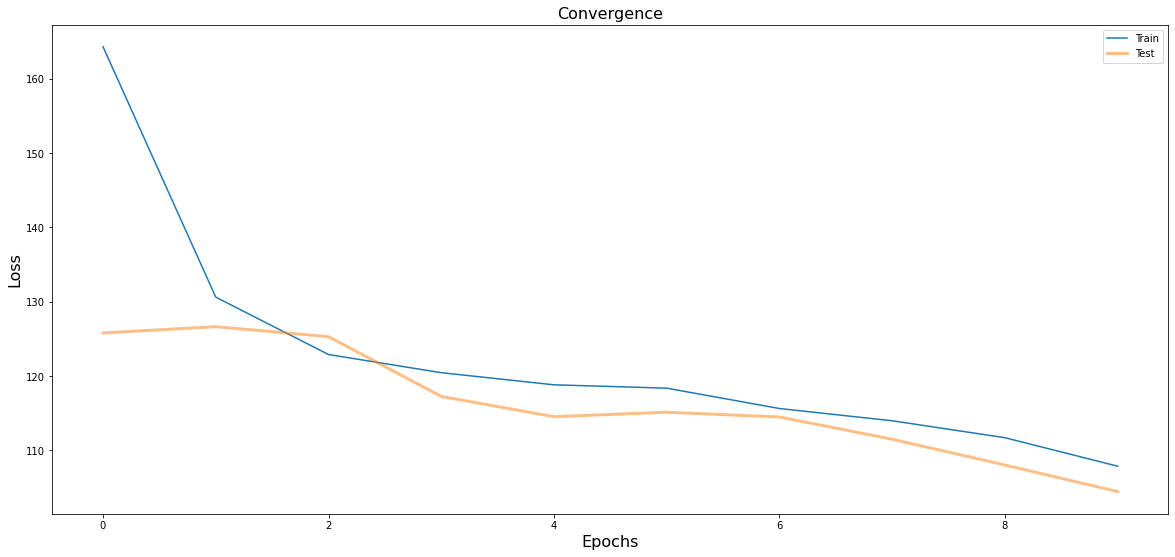

In [82]:
plt.figure(figsize=(20, 9))
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test', linewidth=3, alpha=0.5)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convergence', fontsize=16)
plt.legend()
plt.show()
